DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

 

Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

Project Task: Week-1

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
• Glucose 
• BloodPressure 
• SkinThickness
• Insulin 
• BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

Project Task: Week 2
Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

 

Project Task: Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

 

Project Task: Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.



Week-1
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose
• BloodPressure
• SkinThickness
• Insulin
• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline 

In [3]:
#importing data in the python environment
df=pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


I could sucessfully read the database and named it as df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In the table there are 768 rows and 9 columns
-BMI and DiabetesPedigreeFunction are of float type 
-and the remainging 7 columns are integer type 

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


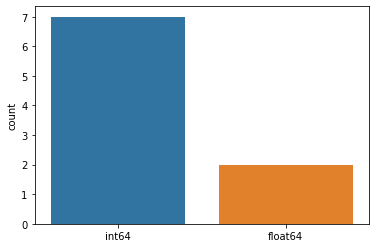

In [6]:
#count (frequency) plot describing the data types  integer and float data type variables in this dataset.  
import seaborn as sns
sns.countplot(df.dtypes.map(str))
plt.show()

In [7]:
#To find out if there are any missing values or null values
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
#Total count of Null values
df.isna().sum().sum()

0

No Null values

In [9]:
df.duplicated().sum()# no duplicate values

0

There are no null values/ missing values in the above table and no duplicate data

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The minimum values: of BlooPressure, SkinThickness, Insulin and BMI shows - '0'- which is not possible. We should check no of 'Zeros' in each column 

If we check the maximum values: according to my knowledge Insuling is very high which is 864

Week-1
2. Visually explore these variables using histograms. Treat (values with 0) accordingly.

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
#To find no of zeros in all the columns
(df==0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
print ('No fo Zeros in each column')
(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]==0).sum()

No fo Zeros in each column


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

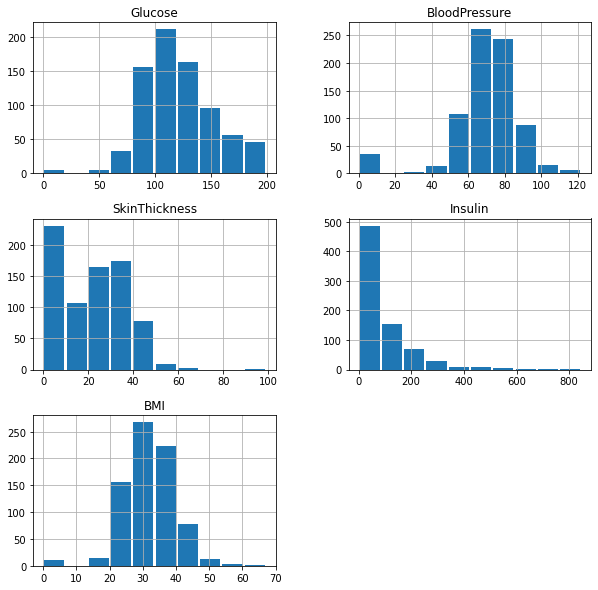

In [14]:
#Visually explore these variables using histograms
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].hist(bins=10, figsize=(10,10), rwidth=0.9)
plt.show()

From the above histograms we can see quite a number of 'zeros' in all the 5 columns

In [15]:
#replace 0 with null
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.NaN)


In [16]:
columns=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]
columns.head(10)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
5,116.0,74.0,NaN,NaN,25.6
6,78.0,50.0,32.0,88.0,31.0
7,115.0,NaN,NaN,NaN,35.3
8,197.0,70.0,45.0,543.0,30.5
9,125.0,96.0,NaN,NaN,NaN


In [17]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

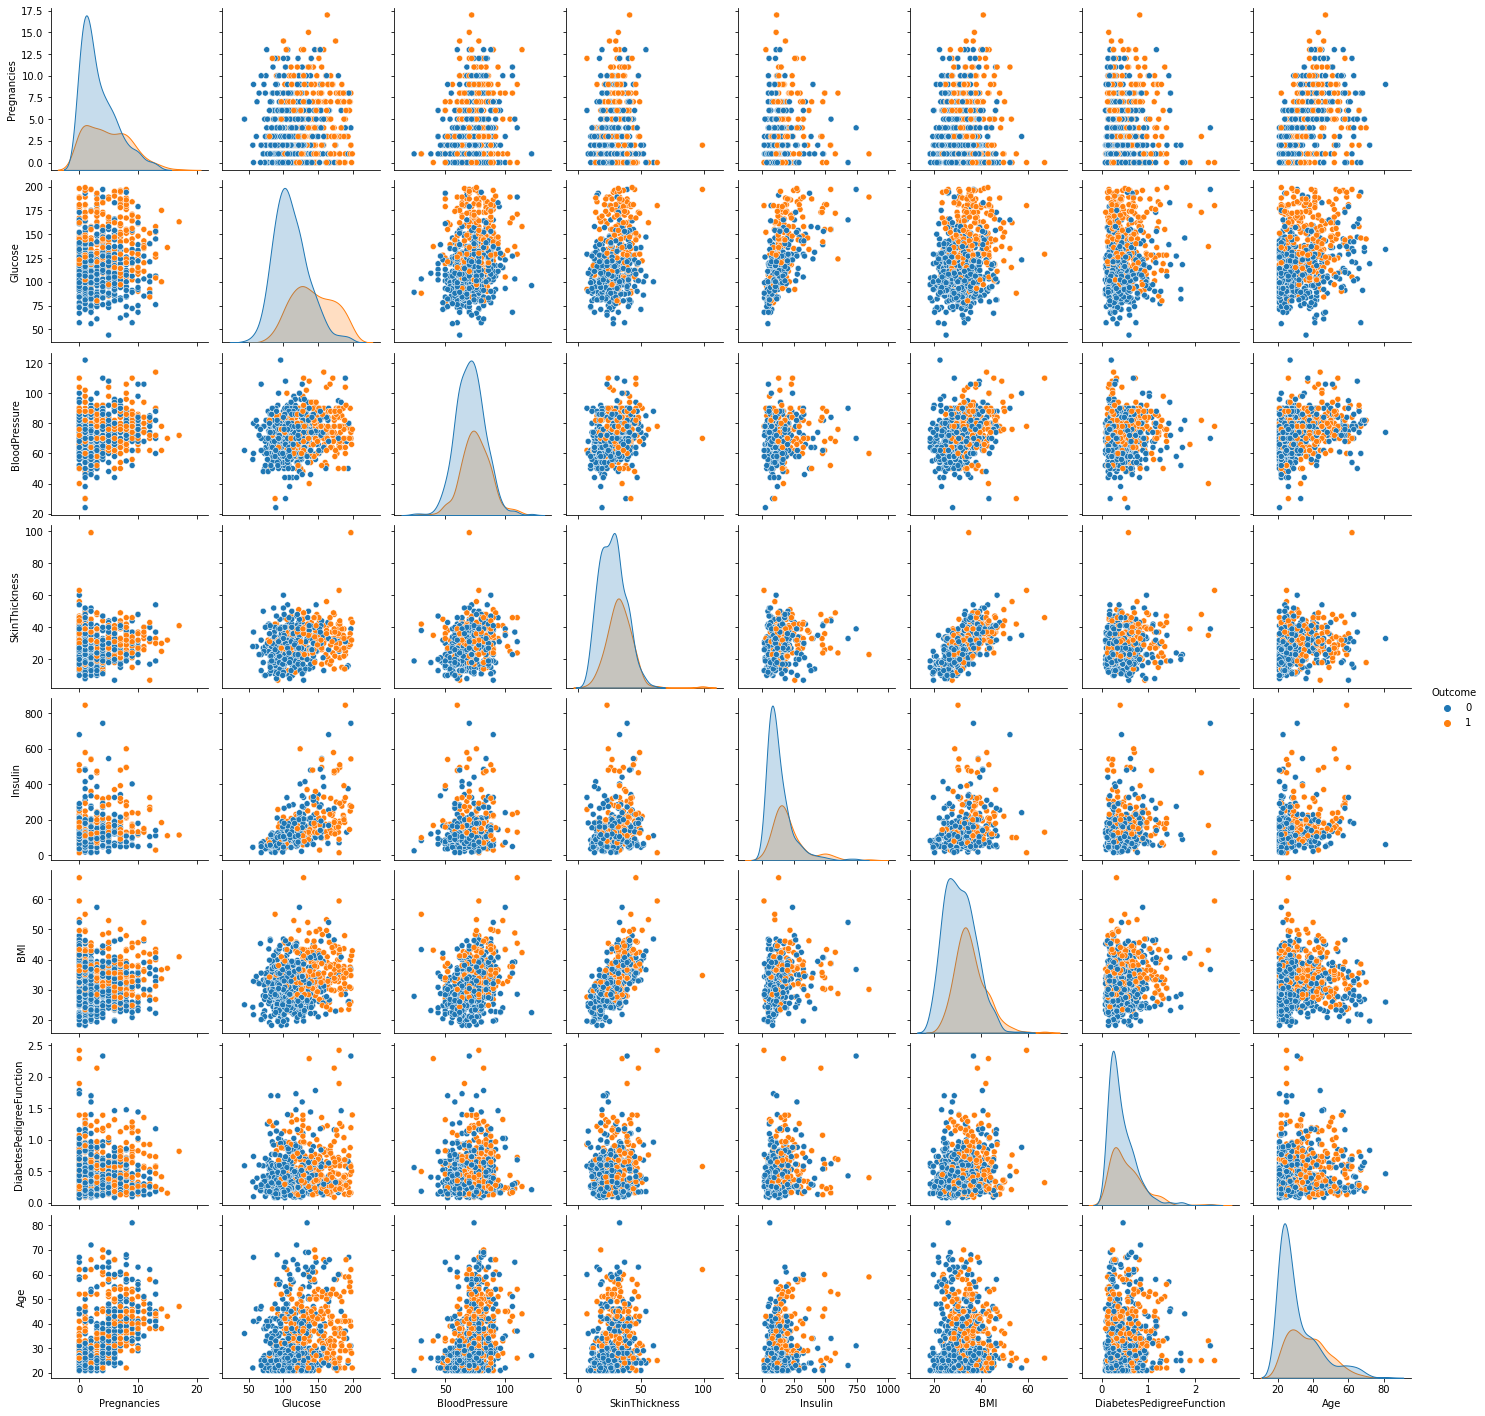

In [18]:
pp1=sns.pairplot(df, hue="Outcome")

From the above pair plot we can see pair of variables with diabetic and non diabetic. 

0 is non-diabetic- orange in colour and 1 is diabetic with blue in colour

A pair plot with missing values where Insulin and SkinThinkness has more missing values 

Let us observe more about the missing values!

<AxesSubplot:>

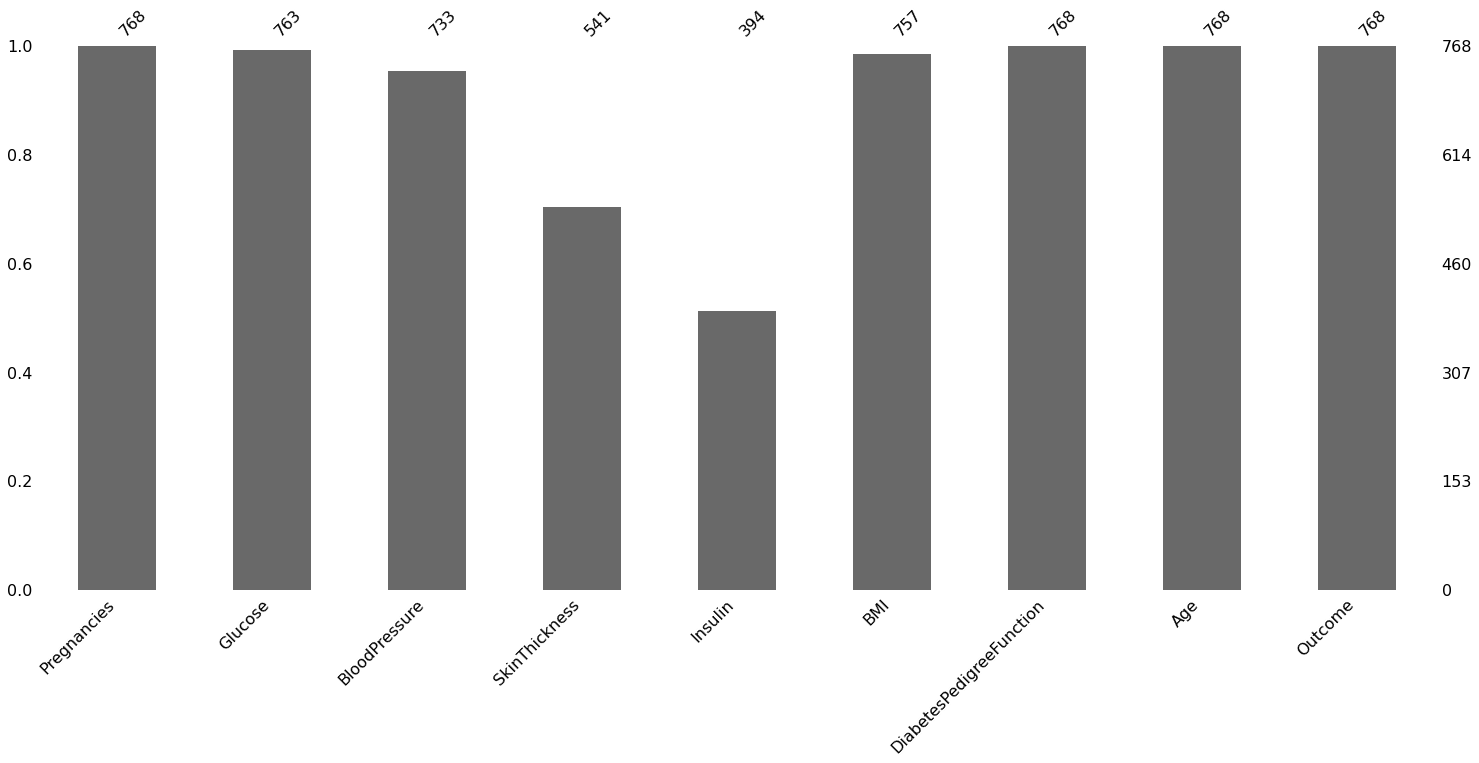

In [19]:

import missingno as msno

msno.bar(df)

Insulin and SkinThinkness has more null values or missing values.

Glucose, BloodPressure and BMI has very few missing values

<AxesSubplot:>

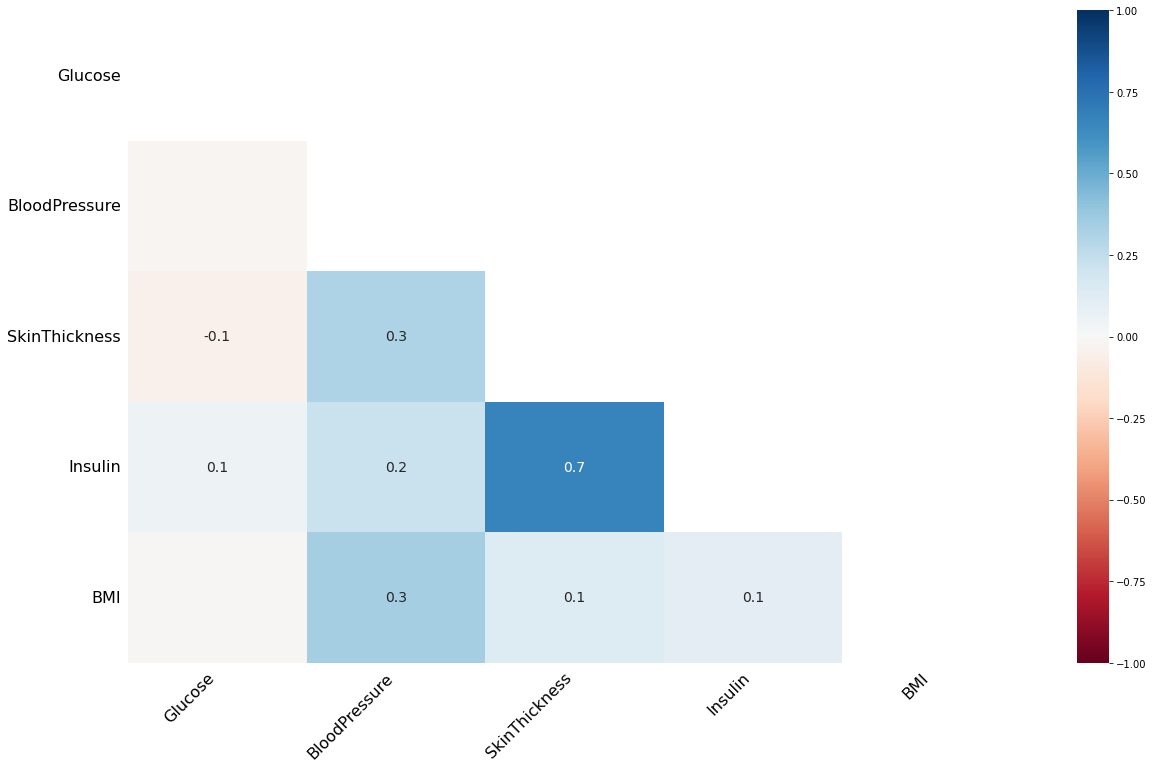

In [20]:
# correlation analysis to understand the relationship between the variables 
msno.heatmap(df)

This is the visualization of missing values - High correlation between Insulin and skinThinkness- 0.7

In [21]:
df.shape

(768, 9)

In [22]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Replacing NaN values with mean or median is not a good suggestion because when we see the outcome column we have the value as 0 or 1 which is diabetic or non-diabetic. The missing values cannot be replaced with mean, median or mode.
If we replace them with mean,median or mode it may lead to misinterpretation.
I think we should use KNNimputer- Know Nearest Neighbout Imputer a scikit-learn class used to fill out or predict the missing values in a dataset. Then the diabetic missing values will find nearest neighbour, similarly the non-diabetic will find nearest neighbout. Such values will be imputed in the missing or Null values.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.impute import KNNImputer
df_knn = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)
df_knn.iloc[:,:] = knn_imputer.fit_transform(df_knn)

In [24]:
df_knn.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

After using the KNNImputer and imputed the values in the null values now we found that they are no null values in the table.

In [25]:
df_knn.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.598177,72.371354,29.114583,153.180208,32.427344,0.471876,33.240885,0.348958
std,3.369578,30.496543,12.206417,9.424100,98.385308,6.886588,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,87.900000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.700000,32.090000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.000000,190.150000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Earlier before imputing the min values of  Glucose, BloodPressure, SkinThickness,Insulin and BMI were 0. Now we can observe the changed min values.

Project Task: Week 2 Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

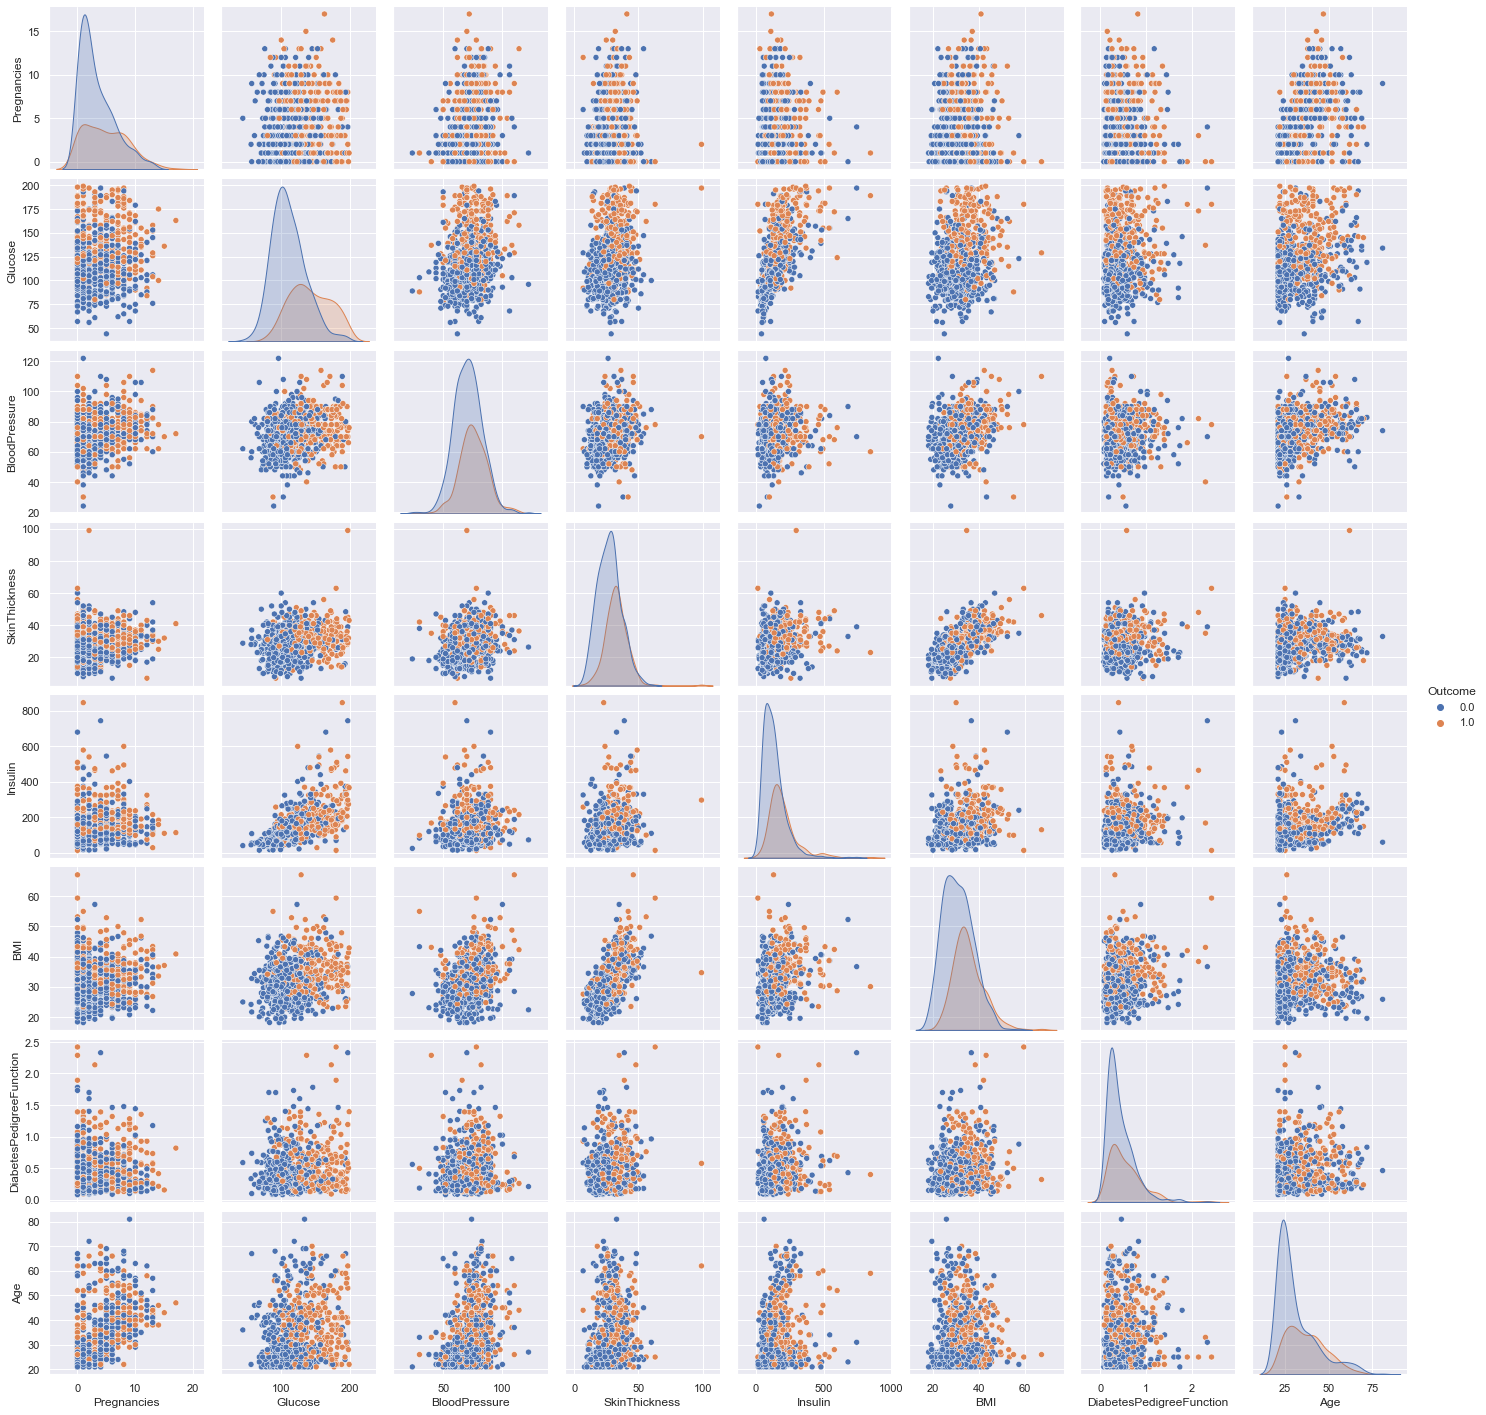

In [26]:
#pair plotting the variables to check their distribution and relation
pp=sns.pairplot(df_knn, hue="Outcome")

Earlier Insulin and Skinthikness had more missing values in the pair plot

Now we can observe the difference after imputing the values 

we can also observe there is so much of overlapping as the data is not distributed properly for such kind of data KNN, Decision tree and Random forest can be used which are more helpful for non-linear classification. Where as Logistic regression may not creat a best fit line for this data as there is so much of overlapping.

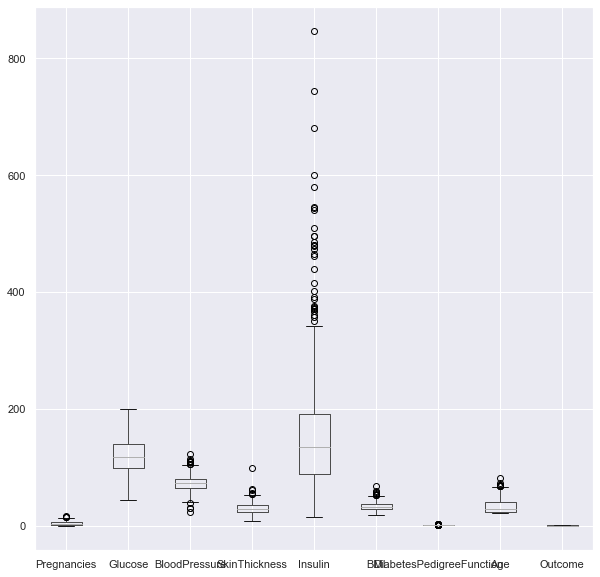

In [27]:
#finding outliers by visualization
df_knn.boxplot(figsize=(10,10))
plt.show()

We can also see outliers except for Glucose. It is always good to remove outliers. Few of them might be inaccurate they may lead to skew the results. Let us check individually all the columns that has outliers.

In [28]:
df_clean=df_knn.copy()

<AxesSubplot:xlabel='Pregnancies'>

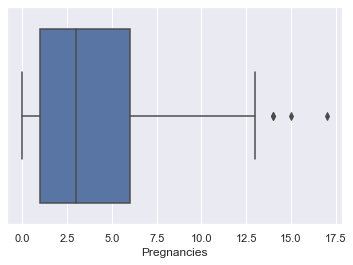

In [29]:
sns.boxplot(x=df_knn['Pregnancies'])

Having pregnancies above 13 is treated as an outlier. Well people can have more than 13 also. But it may be impacted while using KNN algorithm, it would be good to remove the outliers 

In [30]:
df_clean= df_clean[df_clean['Pregnancies']<=13]

<AxesSubplot:xlabel='BloodPressure'>

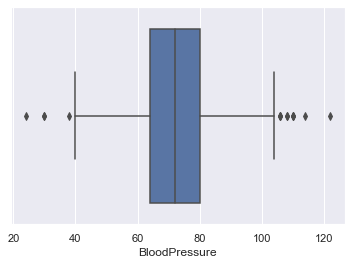

In [31]:
sns.boxplot(x=df_clean['BloodPressure'])

Removing values less than 30 for BloodPressure- very obvious that BP cannot be so less. 

Where as it can be more than 120, it is called High BP

In [32]:
df_clean= df_clean[df_clean['BloodPressure']>=30]

<AxesSubplot:xlabel='SkinThickness'>

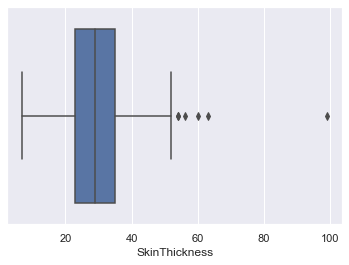

In [33]:
sns.boxplot(x=df_clean['SkinThickness'])

Clearly one outlier is visible very far form the other numbers so removing only that one outlier

In [34]:
df_clean= df_clean[df_clean['SkinThickness']<=80]

<AxesSubplot:xlabel='Insulin'>

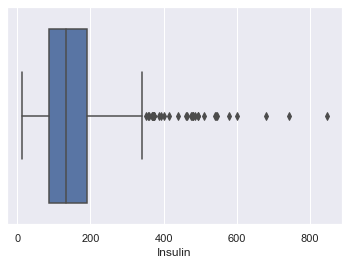

In [35]:
sns.boxplot(x=df_clean['Insulin'])

Insulin above 600 seems to be very unusual it may skew the model so removing those data

In [36]:
df_clean= df_clean[df_clean['Insulin']<=600]

<AxesSubplot:xlabel='BMI'>

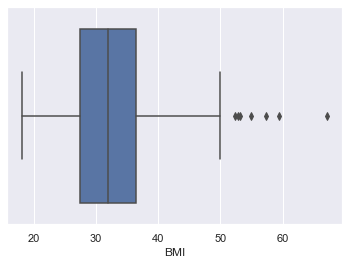

In [37]:
sns.boxplot(x=df_clean['BMI'])

one outlier is clearly seen removing data.

In [38]:
df_clean= df_clean[df_clean['BMI']<=60]

<AxesSubplot:xlabel='Age'>

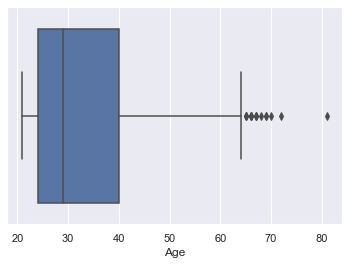

In [39]:
sns.boxplot(x=df_clean['Age'])

In [40]:
df_clean.sort_values(by ='Age',ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
459,9.0,134.0,74.0,33.0,60.0,25.90,0.460,81.0,0.0
453,2.0,119.0,82.8,22.8,249.8,19.60,0.832,72.0,0.0
666,4.0,145.0,82.0,18.0,149.2,32.50,0.235,70.0,1.0
123,5.0,132.0,80.0,24.8,281.2,26.80,0.186,69.0,0.0
684,5.0,136.0,82.0,23.4,221.2,31.64,0.640,69.0,0.0
...,...,...,...,...,...,...,...,...,...
721,1.0,114.0,66.0,36.0,200.0,38.10,0.289,21.0,0.0
136,0.0,100.0,70.0,26.0,50.0,30.80,0.597,21.0,0.0
550,1.0,116.0,70.0,28.0,119.2,27.40,0.204,21.0,0.0
119,4.0,99.0,76.0,15.0,51.0,23.20,0.223,21.0,0.0


Not very sure- age above 80 - so not doing anything about it

In [41]:
print("We removed",df_knn.shape[0]-df_clean.shape[0],"outliers")

We removed 10 outliers


<AxesSubplot:>

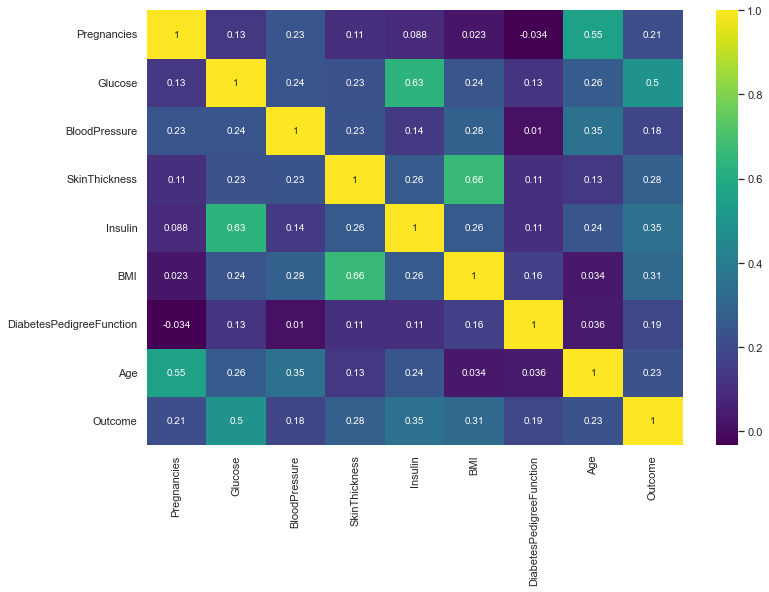

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df_clean.corr(),annot=True,cmap='viridis')

After imputing null values and removing around 5 outliers the above visualization helps us to understand positive and negative correlation between variables.

Positive correlation:
SkinThickness and BMI has 0.66 
Insulin and Glucose has 0.65
Age and Pregnancies has 0.56

And there is no negative correlation 

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

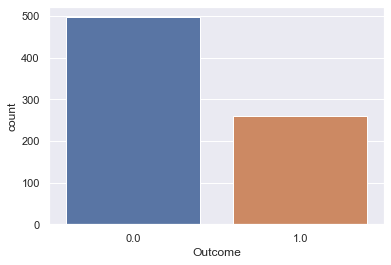

In [43]:
#plotting the outcomes by their value
sns.countplot(df_clean['Outcome'])

In [60]:
#count of outcomes 
df_clean['Outcome'].value_counts()

0.0    497
1.0    261
Name: Outcome, dtype: int64

In [61]:
# count of Outcome in %
df_clean['Outcome'].value_counts()* 100/len(df_clean)

0.0    65.567282
1.0    34.432718
Name: Outcome, dtype: float64

imbalance of data 0- 65% are not diabetic and 35% are diabetic - which is an imbalance of data-SMOTE can be applied

SMOTE - over sampling technique for 65 % and 35% data set as the difference is quite less.

In [62]:
X= df_clean.drop('Outcome',axis=1) # Predictor variables
y=df_clean['Outcome'] #outcome variable

In [63]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [65]:
!pip install sklearn
from sklearn.neighbors import KNeighborsClassifier


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
Kmodel=KNeighborsClassifier()
Kmodel.fit(X_train,y_train)
y_predict=Kmodel.predict(X_test)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.7280701754385965


col_0,0.0,1.0
Outcome,,
0.0,126,26
1.0,36,40


In [68]:
!pip install imblearn
from imblearn.over_sampling import SMOTE


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
sm=SMOTE(random_state=42) #initalize SMOTE
X_train_sm, y_train_sm=sm.fit_resample(X_train,y_train) 

X_test_sm,y_test_sm=sm.fit_resample(X_test,y_test)

In [ ]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

we can see after using SMOTE the data for 1 and 0 has the same no of records. i.e 345 records. 

Before SMOTE 0 has 345 and 1 has only 188 records

In [51]:
models=[]
model_accuracy=[]
model_f1=[]
model_auc=[]

# Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [70]:
sm=SMOTE(random_state=42) #initalize SMOTE
X_train_sm, y_train_sm=sm.fit_resample(X_train,y_train) 
X_test_sm, y_test_sm=sm.fit_resample(X_test,y_test)

In [71]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X,y, test_size=0.3,random_state=42)

In [72]:
lr=LogisticRegression()
lr.fit(X,y)
lr.score(X_train_sm, y_train_sm) # accuracy score on training data

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7641509433962265

In [73]:
lr.score(X_train_sm, y_train_sm)

0.7641509433962265

AUC and Roc curve

In [74]:
probs= lr.predict_proba(X_test_sm)[::,1]
auc_lr=metrics.roc_auc_score(y_test_sm,probs)
print ('auc: %3f'%auc_lr)

auc: 0.826524


Text(0.5, 1.0, 'ROC curve:')

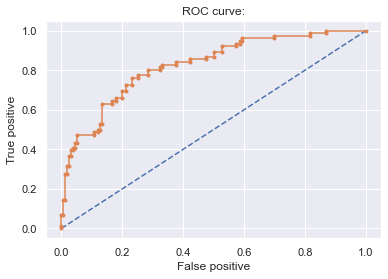

In [75]:
fpr,tpr,thresholds=metrics.roc_curve(y_test_sm,probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC curve:")

Precision and Recall curve

In [81]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_recall_curve,average_precision_score

f1= 0.567 auc_pr=0.726 ap=0.728


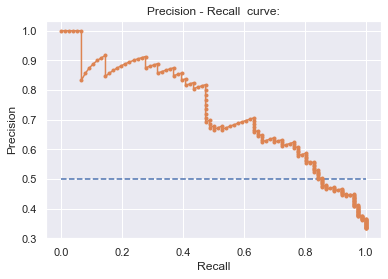

In [82]:

pred_ytest=lr.predict(X_test_sm)
precision, recall, thresholds=metrics.precision_recall_curve(y_test_sm,probs)
f1=f1_score(y_test_sm,pred_ytest)
auc_lr_pr= metrics.auc(recall,precision)
ap= average_precision_score(y_test_sm,probs)
print ("f1= %.3f auc_pr=%.3f ap=%.3f" %(f1,auc_lr_pr,ap))

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall,precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall  curve:")
plt.show()

Adding the values in the dataset for comparision

In [83]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test_sm,pred_ytest))
model_f1.append(f1)
model_auc.append(auc_lr)

# Decision tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_sm,y_train_sm)
dtc.score(X_train_sm,y_train_sm)

1.0

In [85]:
dtc.score(X_test_sm,y_test_sm)

0.7368421052631579

## GridSearch CV to optimize the performance of Decision Tree

In [87]:
from sklearn.model_selection import GridSearchCV, cross_val_score
parameters ={'max_depth': [1,2,3,4,5,6,7,8,9,10,None]}
griddtc=GridSearchCV(dtc,param_grid=parameters,cv=5,verbose=0)
griddtc.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]})

In [88]:
print('Best parameters:', griddtc.best_params_)
print('Best accuracy score: ',griddtc.best_score_ )

Best parameters: {'max_depth': 4}
Best accuracy score:  0.7388637155803416


In [90]:
bestdtc=DecisionTreeClassifier(max_depth=5)
bestdtc.fit(X_train_sm,y_train_sm)
print('Accuracy score for Training Dataset:',bestdtc.score(X_train_sm,y_train_sm))
print('Accuracy score for test data: ',bestdtc.score(X_test_sm,y_test_sm) )

Accuracy score for Training Dataset: 0.8641509433962264
Accuracy score for test data:  0.6885964912280702


## ROC curve

In [91]:
probs= bestdtc.predict_proba(X_test_sm)[::,1]
auc_dt=metrics.roc_auc_score(y_test_sm,probs)
print ('auc: %3f'%auc_dt)

auc: 0.719226


Text(0.5, 1.0, 'ROC curve:')

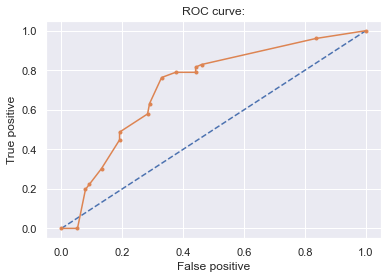

In [92]:
fpr,tpr,thresholds=metrics.roc_curve(y_test_sm,probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC curve:")

f1= 0.489 auc_pr=0.459 ap=0.505


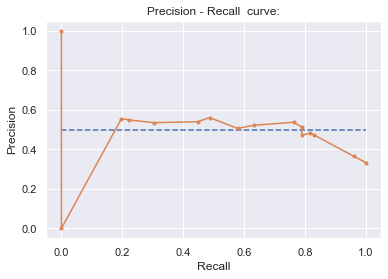

In [93]:
pred_ytest=bestdtc.predict(X_test_sm)
precision, recall, thresholds=metrics.precision_recall_curve(y_test_sm,probs)
f1=f1_score(y_test_sm,pred_ytest)
auc_dt_pr= metrics.auc(recall,precision)
ap= average_precision_score(y_test_sm,probs)
print ("f1= %.3f auc_pr=%.3f ap=%.3f" %(f1,auc_dt_pr,ap))

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall,precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall  curve:")
plt.show()

## append the data

In [94]:
models.append('Decision Tree')
model_accuracy.append(accuracy_score(y_test_sm,pred_ytest))
model_f1.append(f1)
model_auc.append(auc_dt)

# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(random_state=0)

In [112]:
rfc.score(X_train_sm,y_train_sm)

1.0

In [113]:
rfc.score(X_test_sm,y_test_sm)

0.75

## maximise the performance of RFC  by using GridSearch CV

In [114]:
parameters={
    'n_estimators':[5,10,25,50,100,150,200,250],
    'max_depth':[None,1,3,5,7,10,15,20],
    'min_samples_leaf': [1,3,5]
}

gridrfc=GridSearchCV(estimator=rfc,param_grid=parameters,cv=5,verbose=0)
gridrfc.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [5, 10, 25, 50, 100, 150, 200, 250]})

In [115]:
print('Best parameters:', gridrfc.best_params_)
print('Best accuracy score: ',gridrfc.best_score_ )

Best parameters: {'max_depth': 5, 'min_samples_leaf': 3, 'n_estimators': 25}
Best accuracy score:  0.777065179505054


In [116]:
bestrfc=DecisionTreeClassifier(max_depth=5)
bestrfc.fit(X_train_sm,y_train_sm)
print('Accuracy score for Training Dataset:',bestrfc.score(X_train_sm,y_train_sm))
print('Accuracy score for test data: ',bestrfc.score(X_test_sm,y_test_sm) )

Accuracy score for Training Dataset: 0.8641509433962264
Accuracy score for test data:  0.6929824561403509


# ROC curve

In [117]:
probs= bestrfc.predict_proba(X_test_sm)[::,1]
auc_rfc=metrics.roc_auc_score(y_test_sm,probs)
print ('auc: %3f'%auc_rfc)

auc: 0.724810


Text(0.5, 1.0, 'ROC curve:')

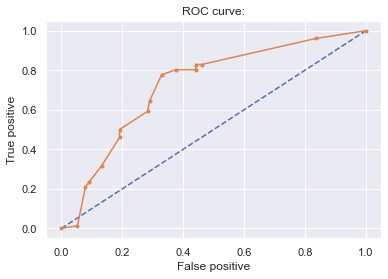

In [118]:
fpr,tpr,thresholds=metrics.roc_curve(y_test_sm,probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC curve:")

f1= 0.500 auc_pr=0.477 ap=0.507


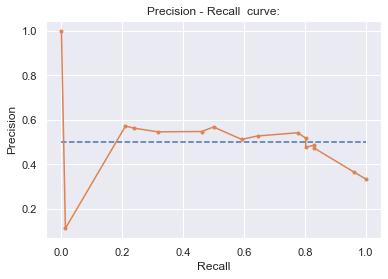

In [119]:
pred_ytest=bestrfc.predict(X_test_sm)
precision, recall, thresholds=metrics.precision_recall_curve(y_test_sm,probs)
f1=f1_score(y_test_sm,pred_ytest)
auc_rfc_pr= metrics.auc(recall,precision)
ap= average_precision_score(y_test_sm,probs)
print ("f1= %.3f auc_pr=%.3f ap=%.3f" %(f1,auc_rfc_pr,ap))

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall,precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall  curve:")
plt.show()

In [120]:
models.append('Random Forest Classifier')
model_accuracy.append(accuracy_score(y_test_sm,pred_ytest))
model_f1.append(f1)
model_auc.append(auc_rfc)

# Support Vector Machine

In [122]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(X_train_sm,y_train_sm)

SVC()

In [124]:
print('Accuracy score- training dataset:',rfc.score(X_train_sm,y_train_sm))
print('Accuracy score- testing dataset:',rfc.score(X_test_sm,y_test_sm))

Accuracy score- training dataset: 1.0
Accuracy score- testing dataset: 0.75


## optimize Gridsearch CV

In [126]:

parameters ={'C': [1,5,10,15,20,25,30,35,40,45,50,55,60],
            'gamma':[0.001,0.005,0.0001,0.00001,0.000001]
            }
gridsvm=GridSearchCV(estimator=svm,param_grid=parameters,cv=5,verbose=0)
gridsvm.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55,
                               60],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05, 1e-06]})

In [135]:
print('Best parameters:', gridsvm.best_params_)
print('Best accuracy score: ',gridsvm.best_score_ )

Best parameters: {'C': 60, 'gamma': 1e-05}
Best accuracy score:  0.7731439525967236


In [128]:
bestsvm=SVC(kernel='rbf',C=60, gamma=0.005,probability=True)
bestsvm.fit(X_train_sm,y_train_sm)
print('Accuracy score for Training Dataset:',bestsvm.score(X_train_sm,y_train_sm))
print('Accuracy score for test data: ',bestsvm.score(X_test_sm,y_test_sm) )

Accuracy score for Training Dataset: 1.0
Accuracy score for test data:  0.6666666666666666


## ROC curve

In [129]:
probs= bestsvm.predict_proba(X_test_sm)[::,1]
auc_svm=metrics.roc_auc_score(y_test_sm,probs)
print ('auc: %3f'%auc_svm)

auc: 0.707453


Text(0.5, 1.0, 'ROC curve:')

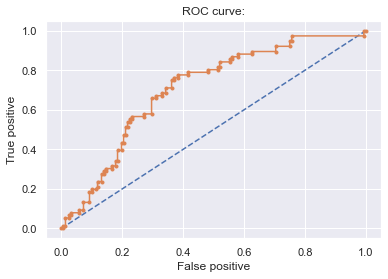

In [130]:
fpr,tpr,thresholds=metrics.roc_curve(y_test_sm,probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC curve:")

f1= 0.424 auc_pr=0.478 ap=0.489


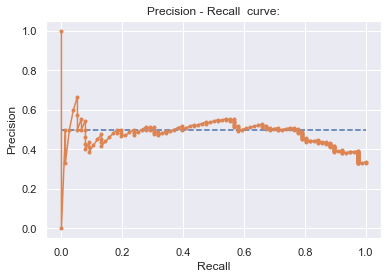

In [131]:
pred_ytest=bestsvm.predict(X_test_sm)
precision, recall, thresholds=metrics.precision_recall_curve(y_test_sm,probs)
f1=f1_score(y_test_sm,pred_ytest)
auc_svm_pr= metrics.auc(recall,precision)
ap= average_precision_score(y_test_sm,probs)
print ("f1= %.3f auc_pr=%.3f ap=%.3f" %(f1,auc_svm_pr,ap))

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall,precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall  curve:")
plt.show()

In [132]:
models.append('Support Vector Machine')
model_accuracy.append(accuracy_score(y_test_sm,pred_ytest))
model_f1.append(f1)
model_auc.append(auc_svm)

# KNN - K Nearest Neighbour

In [143]:
!pip install sklearn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_sm,y_train_sm)


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


KNeighborsClassifier(n_neighbors=3)

In [144]:
print('Accuracy score- training dataset:',knn.score(X_train_sm,y_train_sm))
print('Accuracy score- testing dataset:',knn.score(X_test_sm,y_test_sm))

Accuracy score- training dataset: 0.8283018867924529
Accuracy score- testing dataset: 0.6798245614035088


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

## optimize Gridsearch CV

In [137]:
knn_neighbors=[i for i in range(2,16)]
parameters ={'n_neighbors': knn_neighbors
            }
gridknn=GridSearchCV(estimator=knn,param_grid=parameters,cv=5,verbose=0)
gridknn.fit(X,y)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [138]:
print('Best parameters:', gridknn.best_params_)
print('Best accuracy score: ',gridknn.best_score_ )

Best parameters: {'n_neighbors': 12}
Best accuracy score:  0.7480916695712791


In [148]:
bestknn=KNeighborsClassifier(n_neighbors=12)
bestknn.fit(X_train_sm,y_train_sm)

KNeighborsClassifier(n_neighbors=12)

In [149]:
print('Accuracy score- training dataset:',knn.score(X_train_sm,y_train_sm))
print('Accuracy score- testing dataset:',knn.score(X_test_sm,y_test_sm))

Accuracy score- training dataset: 0.8283018867924529
Accuracy score- testing dataset: 0.6798245614035088


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminate

## ROC Curve

In [150]:
probs= bestknn.predict_proba(X_test_sm)[::,1]
auc_knn=metrics.roc_auc_score(y_test_sm,probs)
print ('auc: %3f'%auc_knn)

auc: 0.763115


Text(0.5, 1.0, 'ROC curve:')

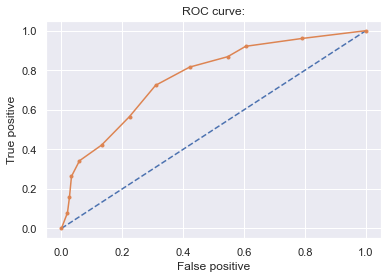

In [151]:
fpr,tpr,thresholds=metrics.roc_curve(y_test_sm,probs)
plt.plot([0,1],[0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC curve:")

f1= 0.500 auc_pr=0.615 ap=0.589


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


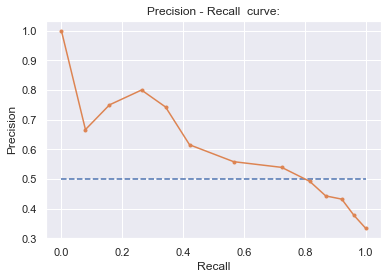

In [152]:
pred_ytest=bestknn.predict(X_test_sm)
precision, recall, thresholds=metrics.precision_recall_curve(y_test_sm,probs)
f1=f1_score(y_test_sm,pred_ytest)
auc_knn_pr= metrics.auc(recall,precision)
ap= average_precision_score(y_test_sm,probs)
print ("f1= %.3f auc_pr=%.3f ap=%.3f" %(f1,auc_knn_pr,ap))

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall,precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision - Recall  curve:")
plt.show()

In [153]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test_sm,pred_ytest))
model_f1.append(f1)
model_auc.append(auc_knn)

Check the performing models

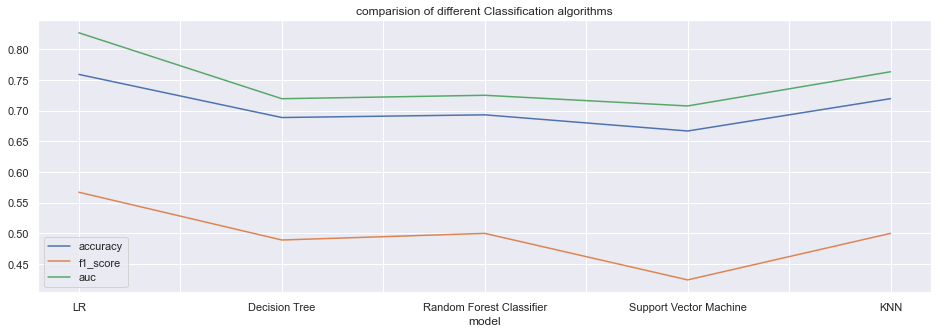

In [154]:
model_summary=pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns=['model','accuracy','f1_score','auc'])
model_summary=model_summary.set_index('model')
model_summary.plot(figsize=(16,5))
plt.title("comparision of different Classification algorithms");

In [155]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.758772,0.566929,0.826524
Decision Tree,0.688596,0.489209,0.719226
Random Forest Classifier,0.692982,0.500000,0.724810
Support Vector Machine,0.666667,0.424242,0.707453
KNN,0.719298,0.500000,0.763115


### from the above we could see LR is having the highest accuracy than the others

In [157]:
from sklearn.metrics import classification_report, confusion_matrix

In [158]:
classification=classification_report(y_test_sm,lr.predict(X_test_sm))
print(classification)

              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       152
         1.0       0.71      0.47      0.57        76

    accuracy                           0.76       228
   macro avg       0.74      0.69      0.70       228
weighted avg       0.75      0.76      0.74       228



https://public.tableau.com/views/capstone-pro2-updated/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

https://public.tableau.com/app/profile/usha.kankipati/viz/capstone-pro2-updated/Dashboard1?publish=yes